K-NeighborsRegressor 단점에 대해서 알아보자
1) 영역에서 벗어날 경우, 어떻게 되는지?
    - 50Cm 일 경우, 예측하는 데 실패가 발생한 이유.

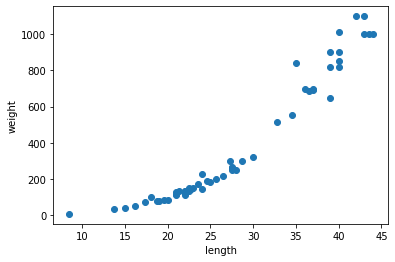

In [2]:
import numpy as np

## 데이터 불러오기 및 array 생성.
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

데이터를 훈련세트와 테스트세트로 구분하자.
1) input 데이터는 2차원 for sklearn training을 위해서

In [3]:
from sklearn.model_selection import train_test_split

## 훈련데이터와 테스트데이터 구분하기
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

## sklearn.training을 위해서 차원 변경(1차원 --> 2차원)
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

## 최근접 이웃 개수가 3일 경우, modeling training.
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

## K-최근접 이웃 회귀 모델 훈련
knr.fit(train_input, train_target)

## 50Cm인 경우, evaluate 하기
print(knr.predict([[50]]))

[1033.33333333]


Investigation for estimation data

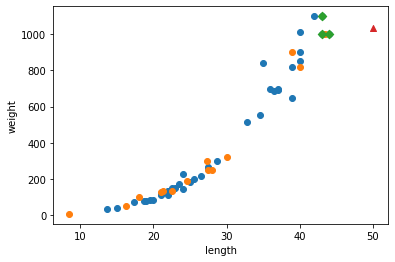

In [4]:
## 해당 데이터의 예측하기 위한 길이와 인덱스가 어떤 데이터인지 확인.
distances, indexs = knr.kneighbors([[50]])

## 훈련 세트의 산점도를 그리기
plt.scatter(train_input, train_target)
plt.scatter(test_input[:,0], test_target)

## 예측하기 위한 데이터 그리기
plt.scatter(train_input[indexs], train_target[indexs], marker='D')

## 50Cm 농어 데이터 그리기
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [5]:
print(np.mean(train_target[indexs]))

1033.3333333333333


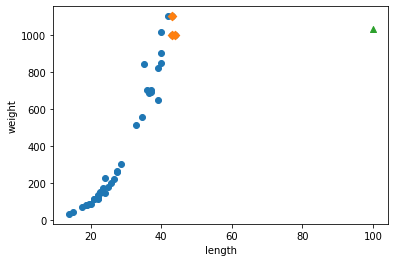

1033.3333333333333


In [6]:
## 해당 데이터의 예측하기 위한 길이와 인덱스가 어떤 데이터인지 확인.
distances, indexs = knr.kneighbors([[100]])

## 훈련 세트의 산점도를 그리기
plt.scatter(train_input, train_target)

## 예측하기 위한 데이터 그리기
plt.scatter(train_input[indexs], train_target[indexs], marker='D')

## 50Cm 농어 데이터 그리기
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print(np.mean(train_target[indexs]))